In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from matplotlib.ticker import LogLocator

# sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

colors = sns.color_palette("tab10")

# Baseline Davidson with artificial matrix

In [2]:
residuals_best_guess = np.array([4.167e-01, 7.829e-02, 1.500e-02, 1.768e-03, 1.688e-04, 2.216e-05, 5.305e-06])
residuals_random_guess = np.array([3.519e-01, 3.900e-01, 4.758e-01, 5.668e-01, 5.700e-01, 5.519e-01, 5.590e-01, 2.570e-01, 8.356e-02, 2.969e-02, 1.003e-02, 2.168e-03,
                                  2.920e-04, 6.639e-05, 2.618e-05, 1.434e-05, 4.166e-06])
residuals_canonical_guess = np.array([1.083e-03, 9.670e-03, 1.106e-02, 1.340e-02, 1.706e-02, 2.303e-02, 3.047e-02, 4.485e-02, 5.928e-02, 8.694e-02, 1.205e-01, 1.824e-01,
    2.358e-01, 3.134e-01, 4.297e-01, 5.885e-01, 7.723e-01, 8.762e-01, 4.991e-01, 2.786e-01, 4.166e-02, 1.071e-02, 5.403e-03, 1.858e-03, 3.261e-04, 1.007e-04, 6.371e-05,3.127e-05, 8.089e-06])

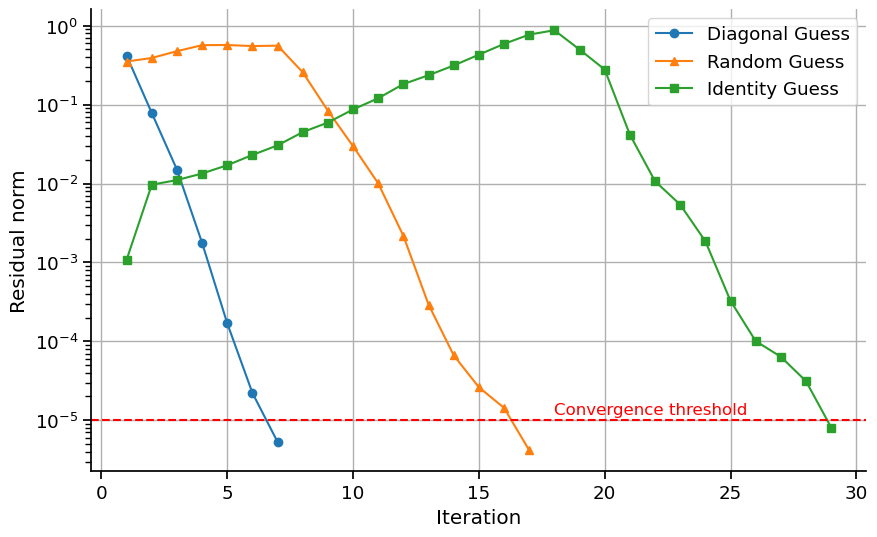

In [3]:
iter_best = np.arange(1, len(residuals_best_guess) + 1)
iter_random = np.arange(1, len(residuals_random_guess) + 1)
iter_canonical = np.arange(1, len(residuals_canonical_guess) + 1)

plt.figure(figsize=(10, 6))
plt.semilogy(iter_best, residuals_best_guess, marker='o', label='Diagonal Guess')
plt.semilogy(iter_random, residuals_random_guess, marker='^', label='Random Guess')
plt.semilogy(iter_canonical, residuals_canonical_guess, marker='s', label='Identity Guess')
plt.axhline(y=1e-5, color='red', linestyle='--')
plt.text(18, 1.2e-5, "Convergence threshold", color="red", fontsize=12)
plt.xlabel('Iteration')
plt.ylabel('Residual norm')
plt.grid(True   )
# plt.title('Residuals vs Iteration for different initial guesses')
plt.legend(loc='upper right')
sns.despine()
plt.savefig('residuals_comparison_synthetic.pdf')
plt.show()

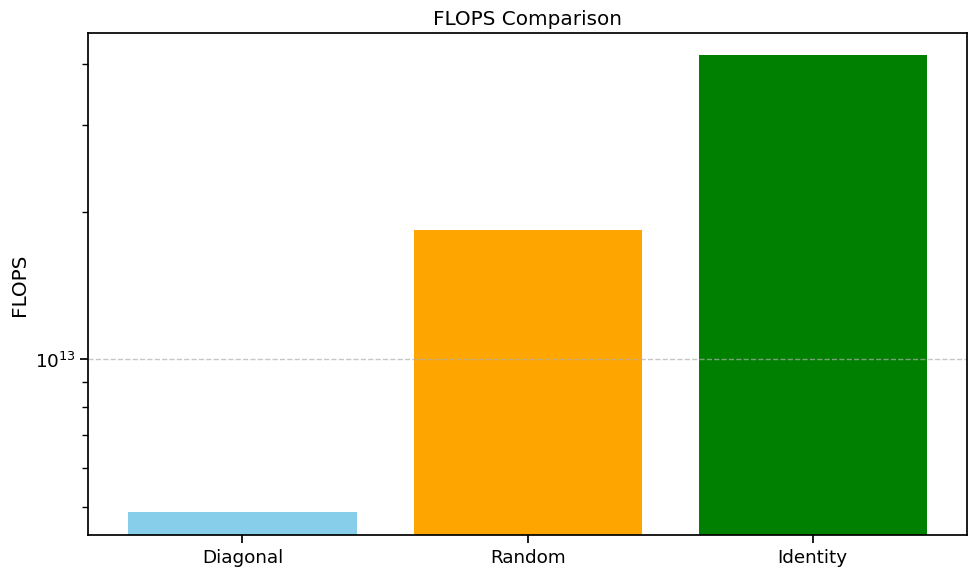

In [4]:
FLOPS_ritz = 4890783982300
FLOPS_random = 18336621012000
FLOPS_identity = 41599222411700

# FLOPS values
FLOPS_values = [4890783982300, 18336621012000, 41599222411700]
methods = ['Diagonal', 'Random', 'Identity']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(methods, FLOPS_values, color=['skyblue', 'orange', 'green'])
plt.ylabel('FLOPS')
plt.title('FLOPS Comparison')
plt.yscale('log')  # use log scale for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('FLOPS_comparison_synthetic.pdf')
plt.show()

# Enhanced Davidson with H2

In [5]:
ritz = np.array([1.060e-01, 1.746e-02, 2.150e-03, 2.711e-04, 2.644e-05, 2.014e-06])
random = np.array([4.556e-01, 2.432e+00, 2.838e-01, 3.239e-02, 6.088e-03, 1.303e-03, 2.707e-04, 7.822e-05, 2.886e-05, 2.913e-05, 4.851e-05, 6.990e-06])
identity = np.array([1.333e+00, 7.933e-01, 1.537e-01, 2.179e-02, 5.127e-03, 8.207e-04, 1.352e-04, 3.553e-05, 1.361e-05, 1.880e-05, 1.634e-05, 2.554e-06])


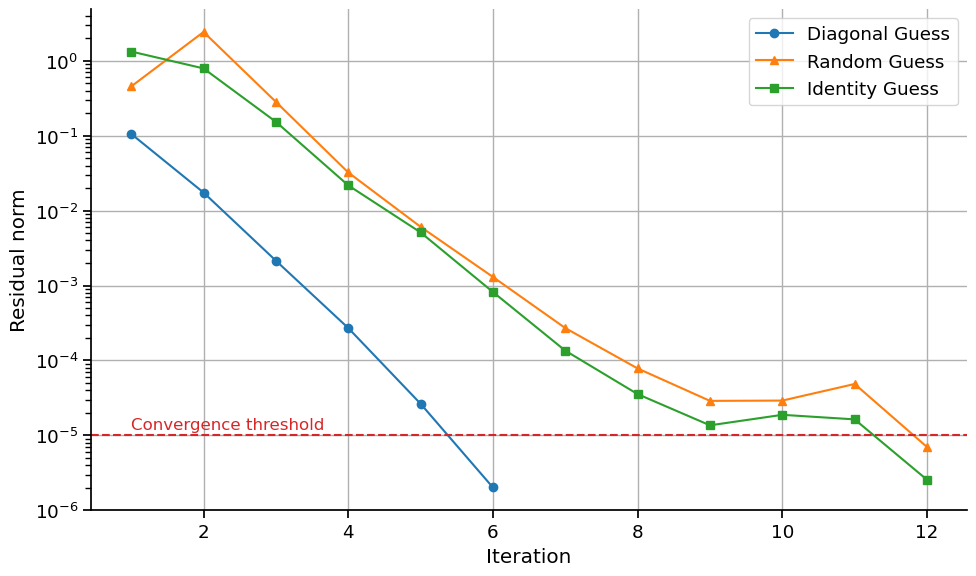

In [6]:
plt.figure(figsize=(10, 6))
plt.semilogy(np.arange(1, len(ritz) + 1), ritz, marker='o', label='Diagonal Guess', color = colors[0])
plt.semilogy(np.arange(1, len(random) + 1), random, marker='^', label='Random Guess', color = colors[1])
plt.semilogy(np.arange(1, len(identity) + 1), identity, marker='s', label='Identity Guess', color = colors[2])
plt.axhline(y=1e-5, color=colors[3], linestyle='--')
plt.text(1, 1.2e-5, "Convergence threshold", color=colors[3], fontsize=12)
plt.xlabel('Iteration')
plt.ylabel('Residual norm')
plt.grid(True)
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('residual_comparison_H2.pdf')

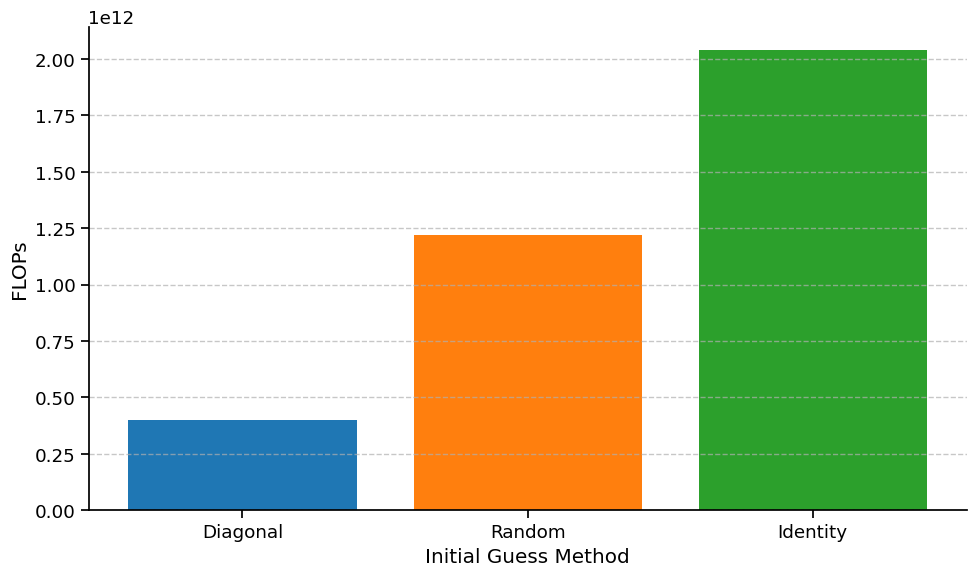

In [7]:
FLOPS_ritz = 401707497300
FLOPS_random = 1219947184600
FLOPS_identity = 2038186871900

# FLOPS values
FLOPS_values = [FLOPS_ritz, FLOPS_random, FLOPS_identity]
methods = ['Diagonal', 'Random', 'Identity']
# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(methods, FLOPS_values, color=[colors[0], colors[1], colors[2]])
plt.ylabel('FLOPs')
plt.xlabel('Initial Guess Method')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.savefig('FLOPS_comparison_H2.pdf')
plt.show() 